In [5]:
import numpy as np
from matplotlib import colors, cm, pyplot as plt
import os
from matplotlib.colors import LogNorm
from matplotlib import ticker
#plt.ioff()
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatter 
from matplotlib.ticker import LogLocator

cwd = os.getcwd() #get the current working directory
#name_den= "test_dtfe128_option111_mpcunit1000.a_den"#the name of the density file interpolated on a grid
name_den = "SUBSAMPLING/SAMPLE512"
name_vel= "fields.a_vel"#the name of the velocity file interpolated on a grid 
name_veldiv="fields.a_velDiv" #the name of the velocity divergence file interpolated on a grid 
path_den=cwd+"/"+name_den
path_vel=cwd+"/"+name_vel
path_veldiv=cwd+"/"+name_veldiv

NGRID=512
L=500




#caution! in the interpolated files, the coordinate values start from 2, end at 1022 
#and the increment is equal to 4
#this is due to the grid options chosen in DTFE, namely, what was used was: --grid 256, 
#therefore the increment is L=1024 / 256 = 4 

#assuming that data_den/data_ is N lines of text, where in each line the order is:
# x y z density_at_(x,y,z)     or
# x y z vel_X_at(x,y,z) vel_Y_at(x,y,z) vel_Z_at(x,y,z)

#z0 mod 4 must be equal 2 
    
#the grid incides go from 0 to 127, so just start consecutively picking the lines after the 
#x0_grid*128*128 th one until (x0_grid +1)*128*128 + 1!
#then reshape the array and we have a 2D array of size 128x128  - given slice (at x0_grid)
#ready to be plotted via matshow 

#depth parameter is going to determine the depth of the plot
#perhaps one could plot many layers on top of each other with different alphas?
#anyway, for now it is just the average of the x0_grid neighbouring 2*depth+1 layers, including
#the one at x0_grid

def plot_2D_density_contrast_grid(datafile,x0_grid,depth): #let's plot in the YZ plane, so setting x0 equal to some value
    if(depth==0):
        density=np.loadtxt(datafile,
                       skiprows=x0_grid*NGRID*NGRID,
                       max_rows=NGRID*NGRID,
                       usecols=(0)#usecols=(3)
                      ).reshape(NGRID,NGRID)
    else:
        density=np.zeros((NGRID,NGRID))
        for i in range(-depth,depth,1):
            temp=np.loadtxt(datafile,
                       skiprows=(x0_grid+i)*NGRID*NGRID,
                       max_rows=NGRID*NGRID,
                       usecols=(0)#usecols=(3)
                      ).reshape(NGRID,NGRID)
            density+=temp
        density/=(2*depth+1)
        
    dens_avg=np.mean(density)
    dens_contrast= density/dens_avg - 1.0*np.ones(density.shape)

    fig, ax = plt.subplots(figsize=(40,40),dpi=200)
    cs = ax.imshow(dens_contrast+1.0,
                   cmap='seismic',
                   norm=LogNorm(),
                   interpolation='gaussian')
    fig.suptitle(r'Density contrast (logscale)'+'\n'+ r'$\delta(\mathbf{x})+1= \frac{\rho(\mathbf{x})}{\rho_{0}}$'+
                 '\n'+'Average over '+str(2*depth+1)+' layers',fontsize=50)
    
    cbar=fig.colorbar(cs)
    cbar.ax.tick_params(labelsize=40)
    
    phys_dist_display_min=0
    phys_dist_display_max=1023
    y=np.linspace(phys_dist_display_min,phys_dist_display_max,num=10) #the physical distances to be displayed
    x=y*NGRID/L                                             #the actual location of the ticks on the grid
    
    ax.set_xticks(x)
    ax.set_yticks(x)
    ax.set_xticklabels(np.asarray(y,dtype=int))
    ax.set_yticklabels(np.asarray(y,dtype=int))
    ax.set_ylabel(r'Distance [$h^{-1}$ Mpc]')
    ax.set_xlabel(r'Distance [$h^{-1}$ Mpc]')
    ax.xaxis.label.set_size(35)
    ax.yaxis.label.set_size(35)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)
    plt.savefig("picdensctrg"+str(x0_grid)+"avg_over"+str(2*depth+1)+"layers.png")
    
def plot_2D_density_grid(datafile,x0_grid, depth): #let's plot in the YZ plane, so setting x0 equal to some value
    if(depth==0):
        density=np.loadtxt(datafile,
                       skiprows=x0_grid*NGRID*NGRID,
                       max_rows=NGRID*NGRID,
                       usecols=(0)#usecols=(3)
                      ).reshape(NGRID,NGRID)
    else:
        density=np.zeros((NGRID,NGRID))
        for i in range(-depth,depth,1):
            temp=np.loadtxt(datafile,
                       skiprows=(x0_grid+i)*NGRID*NGRID,
                       max_rows=NGRID*NGRID,
                       usecols=(0)#usecols=(3)
                      ).reshape(NGRID,NGRID)
            density+=temp
        density/=(2*depth+1)


    dens_max=np.amax(density)
    dens_min=np.amin(density)
    dens_avg=np.average(density)
    print(dens_max)
    print(dens_min)

    fig, ax = plt.subplots(figsize=(40,40),dpi=200)
    cs = ax.imshow(density,
                   cmap='viridis',
                   norm=LogNorm(vmin=density.min()+0.0001, vmax=density.max()),
                   interpolation='gaussian')
    formatter = LogFormatter(10, labelOnlyBase=False) 
    cbar = fig.colorbar(cs, ticks=[0,0.1,0.2,0.5,1,2,5,10],format='%.1f') 
    fig.suptitle(r'Density $\rho(\mathbf{x})$ (logscale)'+
                 '\n'+'Average over '+str(2*depth+1)+' layers',fontsize=50)
    cbar.ax.tick_params(labelsize=40)
    #cb.ax.xaxis.set_ticks(minorticks, minor=True)
    cbar.update_ticks()

    phys_dist_display_min=0
    phys_dist_display_max=L-1
    y=np.linspace(phys_dist_display_min,phys_dist_display_max,num=9) #the physical distances to be displayed
    x=y*NGRID/L                                             #the actual location of the ticks on the grid
    #x=(y-51.2*np.ones(9))/1.8
    ax.set_xticks(x)
    ax.set_yticks(x)
    ax.set_xticklabels(np.asarray(y,dtype=int))
    ax.set_yticklabels(np.asarray(y,dtype=int))
    ax.set_ylabel(r'Distance [$h^{-1}$ Mpc]')
    ax.set_xlabel(r'Distance [$h^{-1}$ Mpc]')
    ax.xaxis.label.set_size(35)
    ax.yaxis.label.set_size(35)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)
    #plt.savefig("picdensg"+str(x0_grid)+"avg_over"+str(2*depth+1)+"layers.png")
    plt.savefig(cwd+"/SUBSAMPLING"+str(NGRID)+"_"+str(x0_grid)+"avg_over"+str(2*depth+1)+"layers.png")

def plot_2D_velocitydiv_grid(datafile,x0_grid, depth): #let's plot in the YZ plane, so setting x0 equal to some value
    if(depth==0):
        veldiv=np.loadtxt(datafile,
                       skiprows=x0_grid*NGRID*NGRID,
                       max_rows=NGRID*NGRID,
                       usecols=(0)#usecols=(3)
                      ).reshape(NGRID,NGRID)
    else:
        veldiv=np.zeros((NGRID,NGRID))
        for i in range(-depth,depth,1):
            temp=np.loadtxt(datafile,
                       skiprows=(x0_grid+i)*NGRID*NGRID,
                       max_rows=NGRID*NGRID,
                       usecols=(0)#usecols=(3)
                      ).reshape(NGRID,NGRID)
            veldiv+=temp
        veldiv/=(2*depth+1)
    
    
    fig, ax = plt.subplots(figsize=(40,40),dpi=200)
    veldivmin=np.min(veldiv)
    veldivmax=np.max(veldiv)

    cs = ax.imshow(veldiv,vmin=veldivmin,vmax=veldivmax,
                   cmap='viridis',
                   interpolation='gaussian')
    cbar = fig.colorbar(cs)
    fig.suptitle(r'Velocity divergence $\nabla \cdot \mathbf{v}$ \n Averaged over'+str(2*depth+1)+'layers',fontsize=50)
    cbar.ax.tick_params(labelsize=60)
    
    phys_dist_display_min=0
    phys_dist_display_max=L-1
    y=np.linspace(phys_dist_display_min,phys_dist_display_max,num=9) #the physical distances to be displayed
    x=y*NGRID/L #the actual location of the ticks on the grid
    ax.set_xticks(x)
    ax.set_yticks(x)
    ax.set_xticklabels(np.asarray(y,dtype=int))
    ax.set_yticklabels(np.asarray(y,dtype=int))
    ax.set_ylabel(r'Distance [$h^{-1}$ Mpc]')
    ax.set_xlabel(r'Distance [$h^{-1}$ Mpc]')
    ax.xaxis.label.set_size(35)
    ax.yaxis.label.set_size(35)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)
    plt.savefig("picveldiv"+str(x0_grid)+"avg_over"+str(2*depth+1)+"layers.png")    
    
def plot_2D_velocity_grid(datafile,x0_grid):
    velocity=np.loadtxt(datafile,
                       skiprows=x0_grid*NGRID*NGRID,
                       max_rows=NGRID*NGRID,
                       usecols=(1,2) #taking the y,z velocitycomponents 
                      ).reshape(NGRID,NGRID,2)
    fig, ax = plt.subplots(figsize=(40,40),dpi=200)
    
    #this is one wants sparser placement of arrows
    divide=6 #for clearer illustration purposes, take every fnth points
    length=L*divide
    
    X=np.arange(0,NGRID/divide)
    Y=np.arange(0,NGRID/divide)
    
    
    U=velocity[0:-1:divide,0:-1:divide,0]
    V=velocity[0:-1:divide,0:-1:divide,1]
    
    
    #U=velocity[:,:,0]
    #V=velocity[:,:,1]

    M=np.hypot(U,V)
    cs = ax.quiver(X,Y,U,V,M,units='xy', pivot='tail', width=0.15,cmap='plasma')
    cbar = fig.colorbar(cs)
    fig.suptitle(r'Velocity field $\mathbf{v}(\mathbf{x})$'+' '+r'$[\frac{km}{s}]$ ',fontsize=50)
    cbar.ax.tick_params(labelsize=60)
    
    phys_dist_display_min=0
    phys_dist_display_max=199
    y=np.linspace(phys_dist_display_min,phys_dist_display_max,num=9) #the physical distances to be displayed
    x=y*NGRID/length #the actual location of the ticks on the grid
    ax.set_xticks(x)
    ax.set_yticks(x)
    ax.set_xticklabels(np.asarray(y,dtype=int))
    ax.set_yticklabels(np.asarray(y,dtype=int))
    ax.set_ylabel(r'Distance [$h^{-1}$ Mpc]')
    ax.set_xlabel(r'Distance [$h^{-1}$ Mpc]')
    ax.xaxis.label.set_size(35)
    ax.yaxis.label.set_size(35)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)
    plt.savefig("picvelcoarser"+str(x0_grid)+".png")


print(path_den)
#plot_2D_density_contrast_grid(path_den,25,0)
#plot_2D_density_grid(path_den,255,0)
#plot_2D_velocity_grid(path_vel,126)
#plot_2D_velocity_grid(path_vel,126)
#plot_2D_velocitydiv_grid(path_veldiv,240,0)


/home/konrad/anaconda3/envs/konradwork/SUBSAMPLING/SAMPLE512


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 2: invalid start byte

78.57378
0.088404424


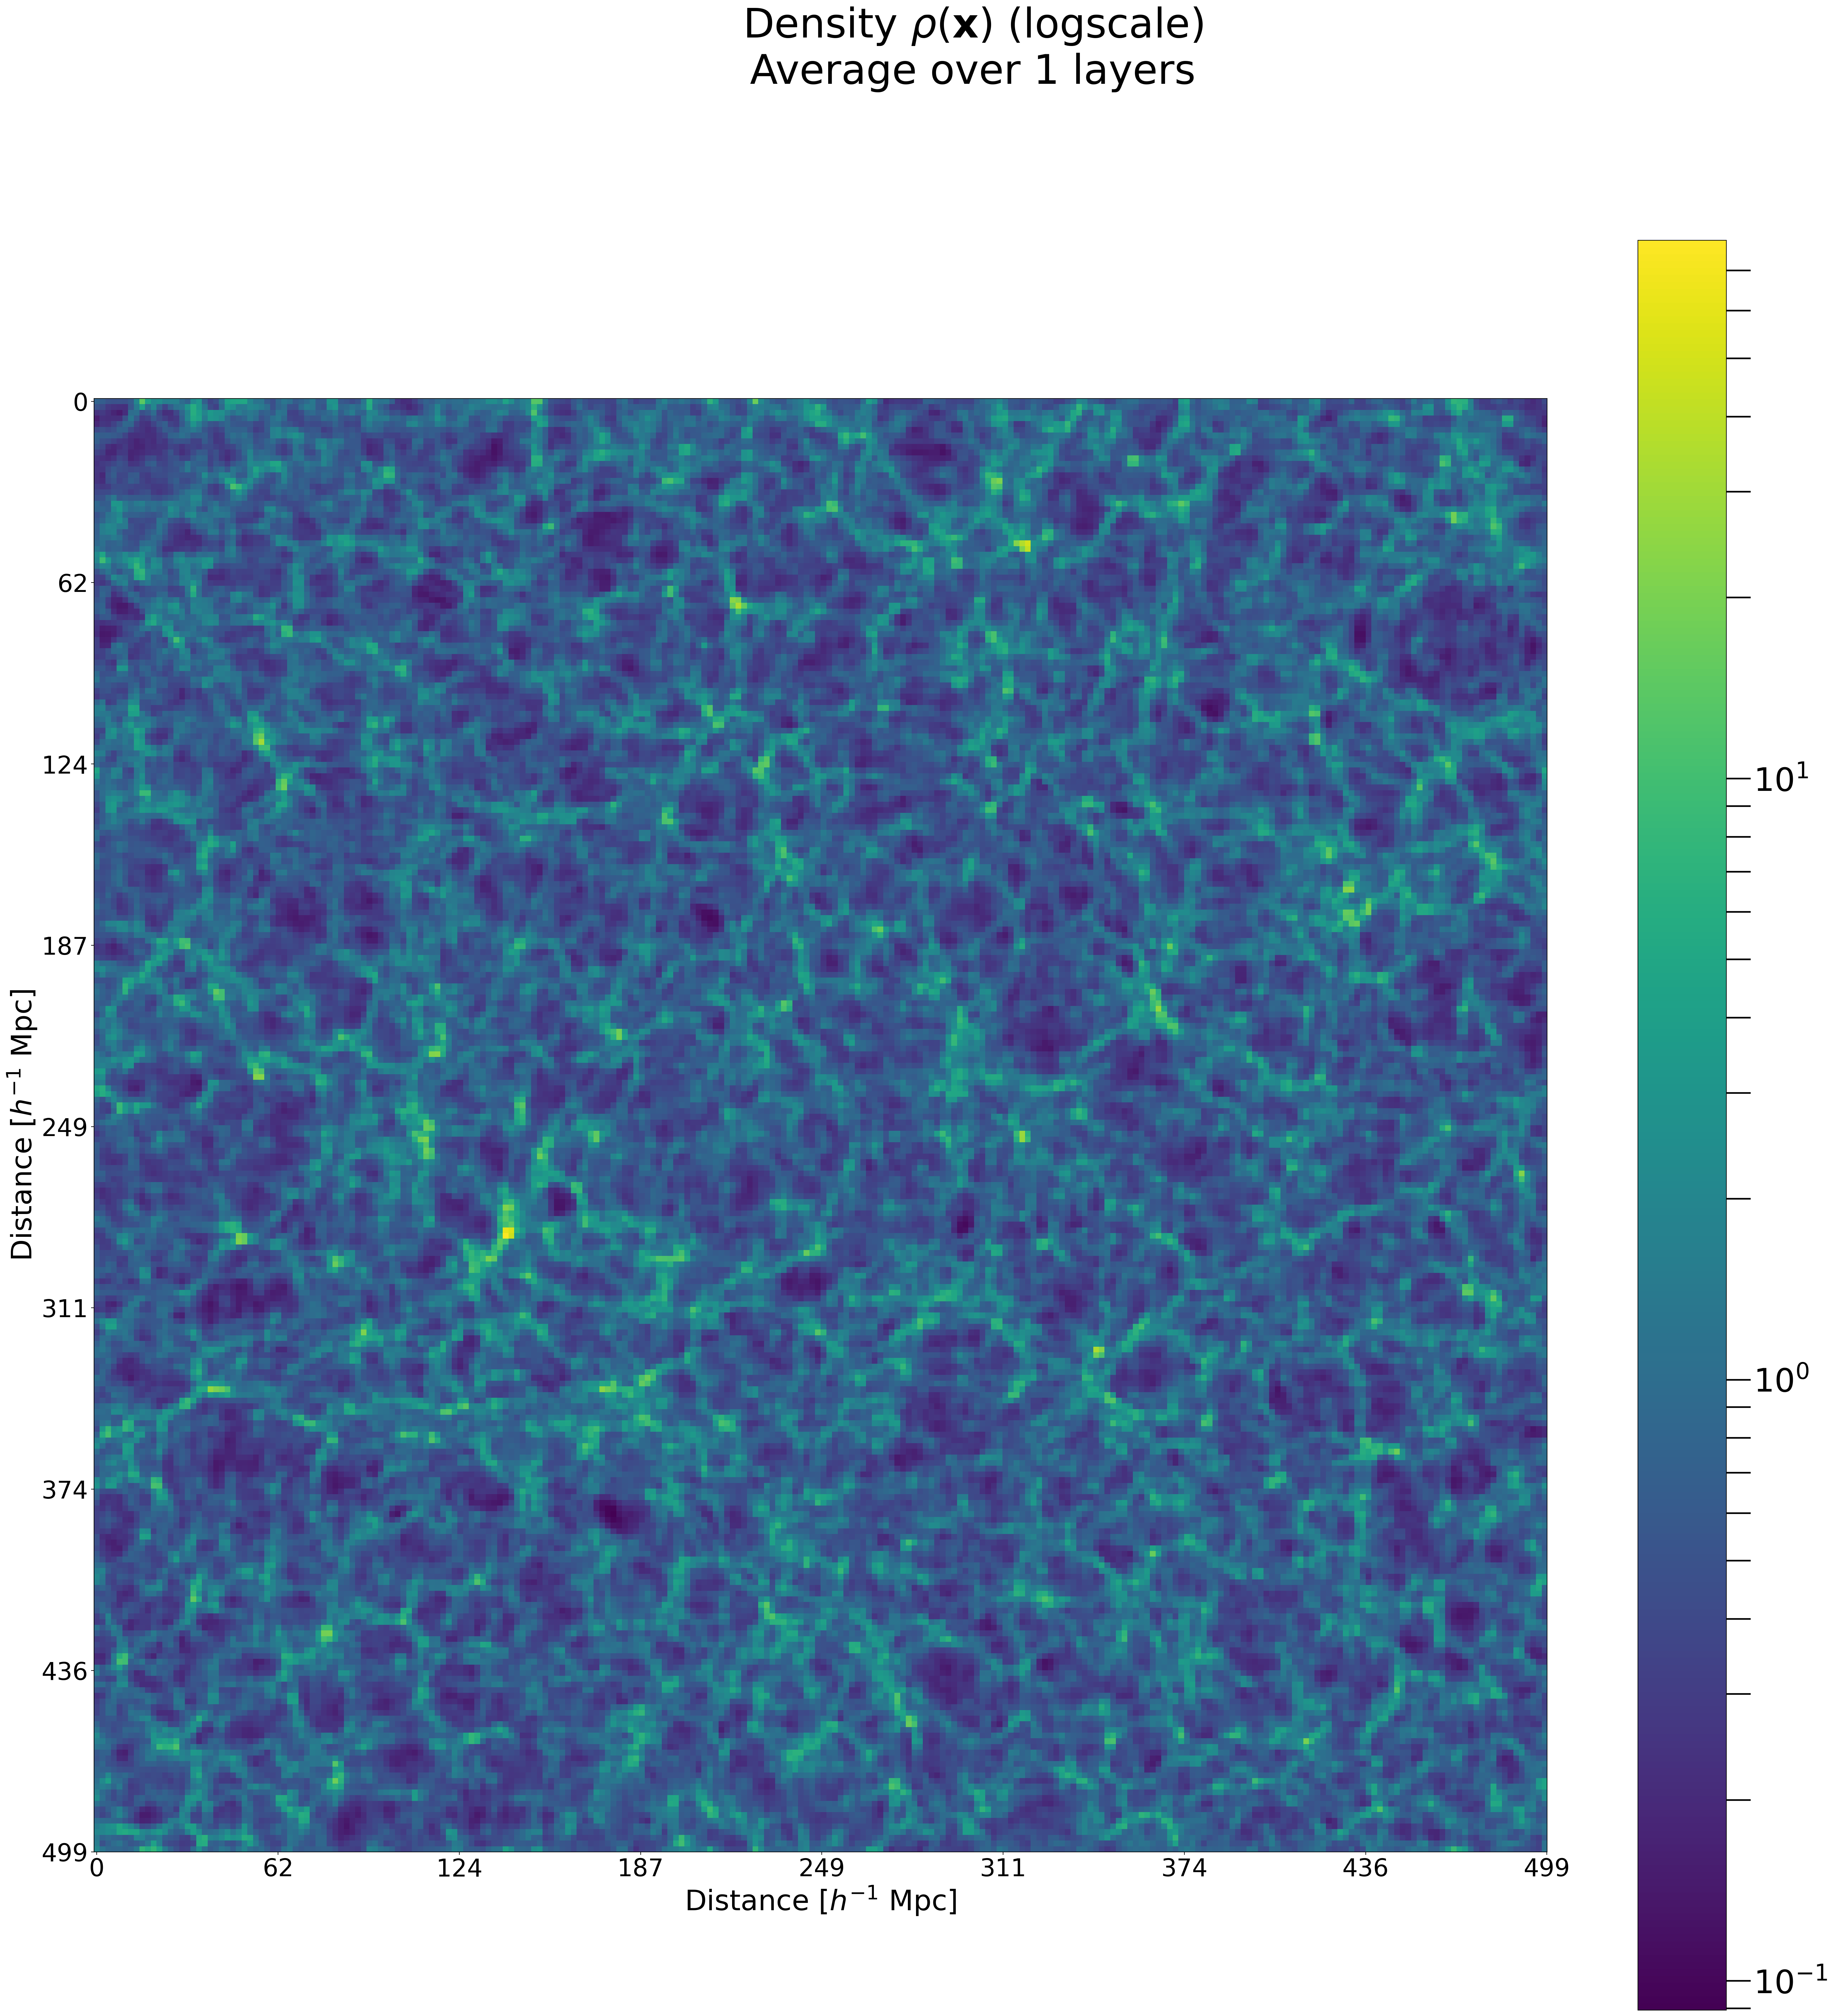

In [30]:
import numpy as np
from matplotlib import colors, cm, pyplot as plt
import os
from matplotlib.colors import LogNorm
from matplotlib import ticker
#plt.ioff()
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatter 
from matplotlib.ticker import LogLocator

cwd = os.getcwd() #get the current working directory
name_den = "SUBSAMPLING/SAMPLE512"
path_den=cwd+"/"+name_den
L=500


NGRIDS=[512,256,128,64]

def plot_2D_density_grid_BINARY(datafile,x0_grid, depth): #let's plot in the YZ plane, so setting x0 equal to some value
    if(depth==0):
        temp=np.fromfile(path_den, dtype=np.float32, count=-1, sep='', offset=0)
        density=temp[x0_grid*NGRID*NGRID:(x0_grid+1)*NGRID*NGRID].reshape(NGRID,NGRID)
    else:
        globtemp=np.fromfile(path_den, dtype=np.float32, count=-1, sep='', offset=0)
        density=np.zeros((NGRID,NGRID))
        for i in range(-depth,depth,1):
            temp=globtemp[(x0_grid+i)*NGRID*NGRID:(x0_grid+i+1)*NGRID*NGRID].reshape(NGRID,NGRID)
            density+=temp
        density/=(2*depth+1)


    dens_max=np.amax(density)
    dens_min=np.amin(density)
    dens_avg=np.average(density)
    print(dens_max)
    print(dens_min)

    fig, ax = plt.subplots(figsize=(40,40),dpi=200)
    cs = ax.imshow(density,
                   cmap='viridis',
                   norm=LogNorm(vmin=density.min()+0.001, vmax=density.max()),
                   interpolation='nearest')
    formatter = LogFormatter(10, labelOnlyBase=False) 
    cbar = fig.colorbar(cs, ticks = LogLocator(subs=range(10)))
                                #, format='%.1f')       
    fig.suptitle(r'Density $\rho(\mathbf{x})$ (logscale)'+
                 '\n'+'Average over '+str(2*depth+1)+' layers',fontsize=50)
    cbar.ax.tick_params(labelsize=40)   
    cbar.ax.tick_params(which="major", length=30, width=2)   

    phys_dist_display_min=0
    phys_dist_display_max=L-1
    y=np.linspace(phys_dist_display_min,phys_dist_display_max,num=9) #the physical distances to be displayed
    x=y*NGRID/L                                             #the actual location of the ticks on the grid
    ax.set_xticks(x)
    ax.set_yticks(x)
    ax.set_xticklabels(np.asarray(y,dtype=int))
    ax.set_yticklabels(np.asarray(y,dtype=int))

    cbar.update_ticks()
    ax.set_ylabel(r'Distance [$h^{-1}$ Mpc]')
    ax.set_xlabel(r'Distance [$h^{-1}$ Mpc]')
    ax.xaxis.label.set_size(35)
    ax.yaxis.label.set_size(35)
    ax.tick_params(axis='both', which='major', labelsize=30)
    #plt.savefig("picdensg"+str(x0_grid)+"avg_over"+str(2*depth+1)+"layers.png")
    plt.savefig(cwd+"/SUBSAMPLING/VISUAL_"+str(NGRID)+"_"+str(x0_grid)+"avg_over"+str(2*depth+1)+"layers.png")
    
#for NGRID in NGRIDS:  
NGRID=256
name_den = "SUBSAMPLING/SAMPLE"+str(NGRID)
path_den=cwd+"/"+name_den
plot_2D_density_grid_BINARY(path_den,int(NGRID/2 -1),0)
